In [3]:
%reload_ext autoreload
%autoreload 2

from brian2 import *
from plotlib import *
from tqdm import tqdm
from pci import *

import experiment_10_full_ping_connectome as ex10


In [46]:
start, end = 1000, 5000
dt, shift = 5, 5
n_mod = 100

with_tms = True
data1 = ex10.run_experiment(
    n_mod=n_mod,
    with_tms=with_tms
)
data2 = ex10.run_experiment(
    n_mod=n_mod,
    with_tms=with_tms,
    with_thalamus=True
)

Setting up synapses... 
	EX_IN_SYN... (28,008 synapses) [0.07s]
	IN_EX_SYN... (40,000 synapses) [0.09s]
	IN_IN_SYN... (10,000 synapses) [0.22s]
	INTER_EX_EX_SYN... (297,345 synapses) [2.05s]
	TMS Spike Generator...  [0.87s]
	TMS_EX_SYN... (40 synapses) [0.01s]
	TMS_IN_SYN... (10 synapses) [0.01s]
All synapses created [3.35s]
Supplying Poisson input to network...  [0.00s]
Running sym...  [22.99s]
Setting up synapses... 
	EX_IN_SYN... (28,094 synapses) [0.08s]
	IN_EX_SYN... (40,000 synapses) [0.10s]
	IN_IN_SYN... (10,000 synapses) [0.23s]
	INTER_EX_EX_SYN... (297,166 synapses) [2.08s]
	TH_OUT_SYN... (79,705 synapses) [7.99s]
	TH_EX_IN_SYN... (7,006 synapses) [7.10s]
	IN_EX_SYN... (10,000 synapses) [7.14s]
	IN_IN_SYN... (2,500 synapses) [6.99s]
	TMS Spike Generator...  [0.90s]
	TMS_EX_SYN... (40 synapses) [0.02s]
	TMS_IN_SYN... (10 synapses) [0.01s]
All synapses created [32.70s]
Supplying Poisson input to network...  [0.01s]
Running sym...  [42.42s]


In [47]:
pre, post, lz = pci(data1, dt, shift)
pre2, post2, lz2 = pci(data2, dt, shift)

In [48]:
#print("Resting state mean: {:.2f}, standard deviation: {:.2f}".format(pre.mean(), pre.std()))
#
#total, above_std = len(pre), len(pre[pre > pre.mean() + 1 * pre.std()])
#print(total, above_std, float(above_std)/total)
#total, above_std = len(post), len(post[post > pre.mean() + 1 * pre.std()])
#print(total, above_std, float(above_std)/total)
print('LZ complexity without thalamus', lz)
print('LZ complexity with thalamus', lz2)

('LZ complexity without thalamus', 0.15224150809367834)
('LZ complexity with thalamus', 0.1725403758395021)


587,989 exc spikes, 452,324 inh spikes


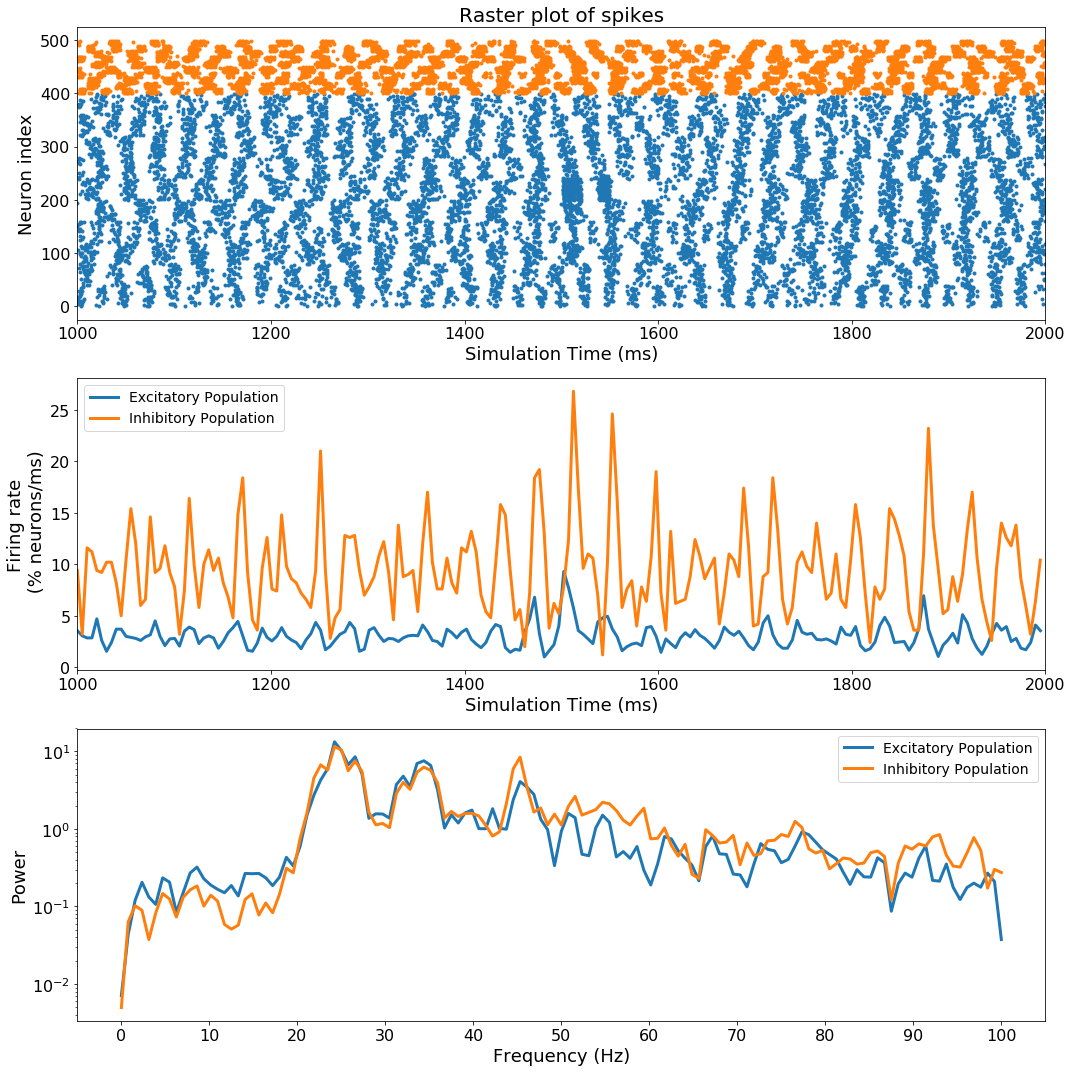

In [35]:
plot_stuff(data, min_mod=85, max_mod=95)

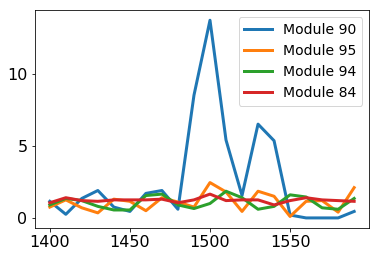

In [13]:
mods = [90, 95, 94, 84]
plot_modules(data, mods, start=1400, end=1600)
